# Assignment 2 Task A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
import time

from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
comment = pd.read_csv("User_Comments.csv")
comment

,CONTENT,CLASS
0,Since when has Katy Perry had her own YouTube ...,0
1,Sub my channel!﻿,1
2,ILove shakira ﻿,0
3,How did THIS Video in all of YouTube get this ...,0
4,Katy Perry - Roar (Official): http://youtu.be/...,0
5,Where did she find all that make up in a freak...,0
6,Check out this video on YouTube:﻿,1
7,Why dafuq is a Korean song so big in the USA. ...,0
8,5 years soon!﻿,0
9,this video is great .....!!! I love this.........,0


In [3]:
X = comment["CONTENT"]
y = comment['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## TFIDF 

In [4]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=3, max_df=0.67, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(X_train)

In [5]:
tfidf_vectorizer.get_feature_names()

['000',
 '000 000',
 '000 000 views',
 '000 views',
 '100',
 '15',
 '20',
 '2011',
 '2014',
 '2015',
 '25',
 '39',
 '39 watching',
 '9bzkp7q19f0',
 'absolutely',
 'actually',
 'adf',
 'adf ly',
 'africa',
 'african',
 'ago',
 'amazing',
 'american',
 'amp',
 'animals',
 'appreciate',
 'artist',
 'ass',
 'attention',
 'awesome',
 'baby',
 'bad',
 'beautiful',
 'beautiful song',
 'believe',
 'bennett',
 'best',
 'best song',
 'best songs',
 'best world',
 'best world cup',
 'better',
 'big',
 'big fan',
 'billion',
 'billion views',
 'bit',
 'black',
 'boy',
 'br',
 'br br',
 'br br br',
 'br href',
 'br href http',
 'buy',
 'called',
 'came',
 'came check',
 'cevxzvsjlk8',
 'champion',
 'chance',
 'change',
 'channel',
 'channel br',
 'charlie',
 'charlie lost',
 'check',
 'check channel',
 'check new',
 'check playlist',
 'check playlist youtube',
 'check video',
 'check video youtube',
 'check views',
 'checking',
 'checking views',
 'com',
 'com projects',
 'com ref',
 'com watch',
 

## Random Forest

In [6]:
parameters = {'n_estimators': np.arange(1, 200, 5),
#               'max_depth': np.arange(1, 40, 2),
#               "max_features": np.arange(0.2, 0.5, 0.1),
             }


rf = ensemble.RandomForestClassifier(class_weight='balanced')
clf_cv = GridSearchCV(rf, parameters, cv=5)

print("Running....")
tic = time.time()
clf_cv.fit(tfidf, y_train)

toc = time.time()
print("Training time: {0:.4f}s".format(toc - tic))

Running....
Training time: 23.3377s


In [7]:
clf = clf_cv.best_estimator_
print(clf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=71, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [8]:
clf = ensemble.RandomForestClassifier(class_weight='balanced', n_estimators=51)
clf.fit(tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=51, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [9]:
y_pred = clf.predict(tfidf_vectorizer.transform(X_test))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       239
           1       1.00      0.84      0.91        55

    accuracy                           0.97       294
   macro avg       0.98      0.92      0.95       294
weighted avg       0.97      0.97      0.97       294

[[239   0]
 [  9  46]]


## "mean_test_score" and "mean_train_score" 

In [10]:
parameters = {'n_estimators': np.arange(1, 200, 5), }

rf = ensemble.RandomForestClassifier(
    class_weight=clf.class_weight, max_depth=clf.max_depth, max_features=clf.max_features)
clf_cv = GridSearchCV(rf, parameters, cv=5, return_train_score=True)

clf_cv.fit(tfidf, y_train)
clf = clf_cv.best_estimator_

Text(0.5, 1.0, 'Mean_test_score/Mean_train_scores vs Number of Trees')

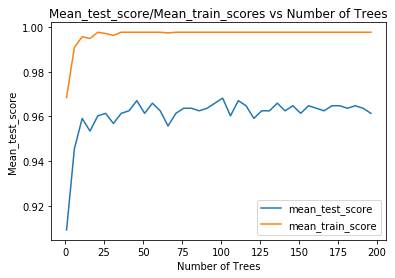

In [11]:
mean_test_scores = clf_cv.cv_results_['mean_test_score']
mean_train_scores = clf_cv.cv_results_['mean_train_score']

plt.figure()
plt.plot(np.arange(1, 200, 5), mean_test_scores, label="mean_test_score")
plt.plot(np.arange(1, 200, 5), mean_train_scores, label="mean_train_score")
plt.xlabel("Number of Trees")
plt.ylabel("Mean_test_score")
plt.legend()
plt.title("Mean_test_score/Mean_train_scores vs Number of Trees")

## Depths of the trees

Text(0.5, 1.0, 'The depths of the trees')

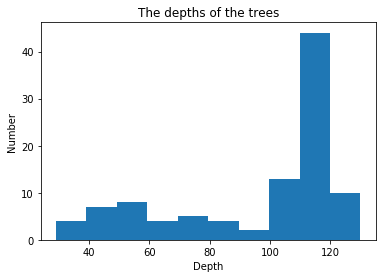

In [12]:
depths = [estimator.tree_.max_depth for estimator in clf.estimators_]
plt.figure()
plt.hist(depths)
plt.xlabel("Depth")
plt.ylabel("Number")
plt.title("The depths of the trees")

In [13]:
# import sklearn 
# help(sklearn.tree._tree.Tree)

## Top 10 most important text features

In [14]:
names = tfidf_vectorizer.get_feature_names()
importances = sorted(clf.feature_importances_, reverse=True)[:10]
importances = list(map(lambda x: round(x, 4), importances))

# indices = [i for i, x in enumerate(clf.feature_importances_) if x in importances]


# importances = np.sort(clf.feature_importances_, reverse=True)[::-1][:10]
indices = np.argsort(clf.feature_importances_)[::-1][:10]

# sorted(zip(map(lambda x: round(x, 4), importances), [names[index] for index in indices]), reverse=True)

In [15]:
fe = pd.DataFrame({"Importance" : importances}, index=[names[index] for index in indices] )
fe

,Importance
check,0.0942
subscribe,0.0909
com,0.0642
http,0.0459
channel,0.0376
subscribers,0.0276
youtube,0.0263
www,0.0258
song,0.0222
thank,0.0201


Text(0.5, 0, 'Importance')

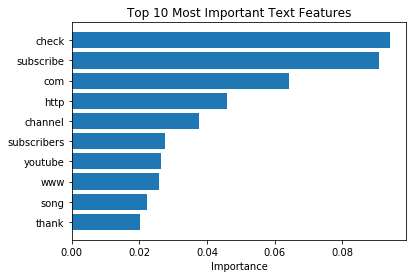

In [16]:
plt.title("Top 10 Most Important Text Features")
plt.barh(range(10), importances[::-1])
plt.yticks(range(10), [names[index] for index in indices[::-1]])
plt.xlabel("Importance")


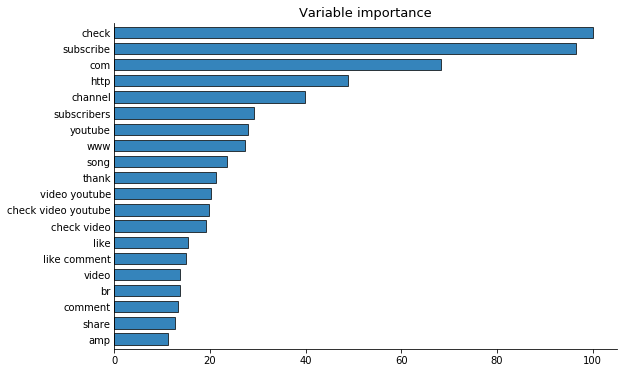

In [17]:
from statlearning import plot_feature_importance

plot_feature_importance(clf, names)
plt.show()